### - Plot model predictions for all the profiling assays: Cell painting, L1000, Combined Cell painting & L1000 based on Precision-Recall AUC score and ROC-AUC scores;




#### - Profiling assays PR-AUC & ROC-AUC scores visualization
#### - Prediction on DOSE basis visualization
#### - Individual MOA predictions found in Test data set



#### - PR-AUC was the primary evaluation metric because it takes into account the practically relevant measures, **precision and recall,** of which precision is particularly important because it measures the fraction of correct predictions among the positive predictions. 

#### - Also, PR-AUC score express the susceptibility of classifiers to imbalanced datasets, since the position of the random baseline depends on the ratio of the numbers of positive and negative instances. [read more](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import median
import random
sns.set_context("talk")
sns.set_style("darkgrid")
from collections import Counter

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import log_loss, roc_curve
from sklearn.metrics import auc

In [4]:
! pip install https://github.com/Phlya/adjustText/archive/master.zip

     \ 3.1MB 5.5MB/s
  Created wheel for adjustText: filename=adjustText-0.8b2-cp37-none-any.whl size=9142 sha256=d2401665aa3c64b3465831c032e3bc793d13a481160e960dd87b338105ed3d14
  Stored in directory: /tmp/pip-ephem-wheel-cache-twi5xoi5/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText


In [5]:
from adjustText import adjust_text

In [6]:
os.getcwd()

'/content'

In [7]:
os.chdir('/content/drive')

In [8]:
cp_test = 'My Drive/profiles/cell_painting/cellpainting_lvl4_cpd_replicate_datasets/test_lvl4_data.csv.gz'
L1000_test = 'My Drive/profiles/L1000/L1000_lvl4_cpd_replicate_datasets/test_lvl4_data.csv.gz'
cp_L1000_test = 'My Drive/profiles/L1000_cellpainting_comparison/L1000_CP_lvl4_datasets/test_lvl4_data.csv.gz'

In [9]:
model_preds_dir = 'My Drive/L1000_CP_models/L1000_CP_model_predictions/'
model_preds_figures = 'My Drive/L1000_CP_models/moa_predictions_figures/'

In [10]:
df_cp_test = pd.read_csv(cp_test, compression='gzip',low_memory = False)
df_L1000_test = pd.read_csv(L1000_test, compression='gzip',low_memory = False)
df_cp_L1000_test = pd.read_csv(cp_L1000_test, compression='gzip',low_memory = False)

In [11]:
##mlknn
df_cp_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_mlknn.csv'))
df_L1000_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_mlknn.csv'))
df_cp_L1000_mlknn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_mlknn.csv'))

In [12]:
##resnet
df_cp_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_resnet.csv'))
df_L1000_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_resnet.csv'))
df_cp_L1000_resnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_resnet.csv'))

In [13]:
##1-d cnn
df_cp_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_1dcnn.csv'))
df_L1000_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_1dcnn.csv'))
df_cp_L1000_cnn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_1dcnn.csv'))

In [14]:
##tabnet
df_cp_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_tabnet.csv'))
df_L1000_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_tabnet.csv'))
df_cp_L1000_tabnet_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_tabnet.csv'))

In [15]:
##stagedNN
df_cp_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_simplenn.csv'))
df_L1000_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_simplenn.csv'))
df_cp_L1000_simplenn_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_simplenn.csv'))

In [16]:
#blend
df_cp_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_blend.csv'))
df_L1000_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_blend.csv'))
df_cp_L1000_blend_test = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_blend.csv'))

##### - Shuffled test predictions

In [17]:
##mlknn shuffle
df_cp_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_mlknn_shuffle.csv'))
df_L1000_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_mlknn_shuffle.csv'))
df_cp_L1000_mlknn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_mlknn_shuffle.csv'))

In [18]:
##resnet shuffle
df_cp_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_resnet_shuffle.csv'))
df_L1000_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_resnet_shuffle.csv'))
df_cp_L1000_resnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_resnet_shuffle.csv'))

In [19]:
##1-d cnn shuffle
df_cp_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_1dcnn_shuffle.csv'))
df_L1000_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_1dcnn_shuffle.csv'))
df_cp_L1000_cnn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_1dcnn_shuffle.csv'))

In [20]:
##tabnet shuffle
df_cp_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_tabnet_shuffle.csv'))
df_L1000_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_tabnet_shuffle.csv'))
df_cp_L1000_tabnet_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_tabnet_shuffle.csv'))

In [21]:
##simpleNN shuffle
df_cp_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_test_preds_simplenn_shuffle.csv'))
df_L1000_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'L1000_test_preds_simplenn_shuffle.csv'))
df_cp_L1000_simplenn_shuf = pd.read_csv(os.path.join(model_preds_dir, 'cp_L1000_test_preds_simplenn_shuffle.csv'))

In [22]:
df_cp_test['moa'] = df_cp_test['moa'].apply(lambda x:x.lower())
df_L1000_test['moa'] = df_L1000_test['moa'].apply(lambda x:x.lower())
df_cp_L1000_test['moa'] = df_cp_L1000_test['moa'].apply(lambda x:x.lower())

In [23]:
moa_class_list = df_cp_test['moa'].unique()

In [24]:
val_moas = [moa for moa_list in moa_class_list for moa in moa_list.split('|')]

In [25]:
val_moas = list(set(val_moas))

In [26]:
len(val_moas)

267

In [27]:
df_cp_tst_targets = df_cp_test[df_cp_cnn_test.columns]
df_L1000_tst_targets = df_L1000_test[df_L1000_cnn_test.columns]
df_cp_L1000_tst_targets = df_cp_L1000_test[df_cp_L1000_cnn_test.columns]

##### - Baseline of Precision-Recall AUC score is determined by the ratio of positives (P i.e. 1) to ratio of positives (P i.e. 1) and negatives (N i.e. 0) i.e. y = P / (P + N)

In [28]:
def calculate_baseline(df, val_moas=val_moas):
  """Calculate the PR- baseline (i.e. P/P+N) for each profiling assay"""
  targts = np.ravel(df[val_moas].values)
  targts_one = [values for num in np.where(targts == 1) for values in num]
  baseline = len(targts_one) / len(targts)
  return baseline

In [29]:
cp_no_skill = calculate_baseline(df_cp_tst_targets)
L1000_no_skill = calculate_baseline(df_L1000_tst_targets)
cp_L1000_no_skill = calculate_baseline(df_cp_L1000_tst_targets)

In [30]:
cp_L1000_no_skill

0.004412495770889141

In [31]:
cp_no_skill

0.004393710595241142

In [32]:
def evaluate(actual, pred, val_moas=val_moas):
  """Evaluate model performance using ROC-AUC and PR-AUC scores"""
  rocauc_score = roc_auc_score(actual[val_moas], pred[val_moas], average='macro')
  pr_auc_score = average_precision_score(actual[val_moas], pred[val_moas], average="micro")
  return [rocauc_score, pr_auc_score]

In [33]:
cp_preds = [df_cp_mlknn_test, df_cp_resnet_test, df_cp_cnn_test, df_cp_tabnet_test, df_cp_simplenn_test, \
            df_cp_mlknn_shuf, df_cp_resnet_shuf, df_cp_cnn_shuf, df_cp_tabnet_shuf, df_cp_simplenn_shuf, \
            df_cp_blend_test]

L1_preds = [df_L1000_mlknn_test, df_L1000_resnet_test, df_L1000_cnn_test, df_L1000_tabnet_test, df_L1000_simplenn_test,
            df_L1000_mlknn_shuf, df_L1000_resnet_shuf, df_L1000_cnn_shuf, df_L1000_tabnet_shuf, df_L1000_simplenn_shuf,
            df_L1000_blend_test]

cp_L1_preds = [df_cp_L1000_mlknn_test, df_cp_L1000_resnet_test, df_cp_L1000_cnn_test, df_cp_L1000_tabnet_test, df_cp_L1000_simplenn_test, \
               df_cp_L1000_mlknn_shuf, df_cp_L1000_resnet_shuf, df_cp_L1000_cnn_shuf, df_cp_L1000_tabnet_shuf, \
               df_cp_L1000_simplenn_shuf,df_cp_L1000_blend_test]

metrics = ['roc_auc_score', 'pr_auc_score',]
model_name = ['_mlknn', '_resnet', '_cnn', '_tabnet', '_simplenn', '_mlknnshuf', '_resnetshuf', '_cnnshuf', '_tabnetshuf', \
              '_simplennshuf', '_blend']
targets_dfs = [df_cp_tst_targets, df_L1000_tst_targets, df_cp_L1000_tst_targets]
assays = ['CP', 'L1000', 'CP_L1000']
preds_all = [cp_preds, L1_preds, cp_L1_preds]

#### - All models predictions

In [34]:
##models predictions for all profiling assays
score_dict = {}
for idx, (assay_name, actual_df) in enumerate(zip(assays, targets_dfs)):
  for mdl, pred_df in zip(model_name, preds_all[idx]):
    model_score = {}
    score_name = assay_name + mdl 
    eval_list = evaluate(actual_df, pred_df)
    for io, met in enumerate(metrics):
      score_dict[score_name] = model_score
      score_dict[score_name][met] = eval_list[io]

In [35]:
df_pred_scores = pd.DataFrame([(k,k1,v1) for k,v in score_dict.items() for k1,v1 in v.items()], 
                              columns = ['id_name', 'metrics', 'values'])

In [36]:
df_pred_scores.head(10)

,id_name,metrics,values
0,CP_mlknn,roc_auc_score,0.525144
1,CP_mlknn,pr_auc_score,0.011303
2,CP_resnet,roc_auc_score,0.594079
3,CP_resnet,pr_auc_score,0.061024
4,CP_cnn,roc_auc_score,0.607033
5,CP_cnn,pr_auc_score,0.055712
6,CP_tabnet,roc_auc_score,0.578481
7,CP_tabnet,pr_auc_score,0.048983
8,CP_simplenn,roc_auc_score,0.592242
9,CP_simplenn,pr_auc_score,0.040522


In [37]:
df_pred_scores['profile_tech'] = df_pred_scores['id_name'].apply(lambda x: '_'.join(x.split('_')[:-1]))
df_pred_scores['model'] = df_pred_scores['id_name'].apply(lambda x: x.split('_')[-1])
df_pred_scores['values'] = df_pred_scores['values'].apply(lambda x: x*100)

In [38]:
df_pred_scores['model'].unique()

array(['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'mlknnshuf',
       'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf', 'blend'],
      dtype=object)

In [39]:
normal_models = ['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'blend']
shuffle_models = ['mlknnshuf', 'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf']

In [40]:
df_score_normal = df_pred_scores.loc[df_pred_scores['model'].isin(normal_models)].reset_index(drop=True)
df_score_shuffle = df_pred_scores.loc[df_pred_scores['model'].isin(shuffle_models)].reset_index(drop=True)

In [41]:
df_score_normal.head()

,id_name,metrics,values,profile_tech,model
0,CP_mlknn,roc_auc_score,52.514370,CP,mlknn
1,CP_mlknn,pr_auc_score,1.130331,CP,mlknn
2,CP_resnet,roc_auc_score,59.407875,CP,resnet
3,CP_resnet,pr_auc_score,6.102421,CP,resnet
4,CP_cnn,roc_auc_score,60.703348,CP,cnn


In [42]:
normal_model_names = {'resnet':'ResNet', 'cnn':'1D-CNN', 'tabnet':'TabNet', 'simplenn':'Simple NN', 'mlknn': 'Ml-KNN', 'blend': 'Models Ensemble'}
shuffle_model_names = {'resnetshuf':'ResNet', 'cnnshuf':'1D-CNN', 'tabnetshuf':'TabNet', 'simplennshuf':'Simple NN','mlknnshuf': 'Ml-KNN'}
def rename_col_values(df, model_name_dict):
  """Rename unique column values"""
  df['metrics'] = df['metrics'].map({'pr_auc_score': 'Precision-Recall_AUC', 'roc_auc_score':'ROC_AUC'})
  df['model'] = df['model'].map(model_name_dict)
  df['profile_tech'] = df['profile_tech'].map({'CP':'Cell painting', 'L1000':'L1000', 'CP_L1000':'Cell painting & L1000'})
  return df

In [43]:
df_score_normal = rename_col_values(df_score_normal, normal_model_names)
df_score_shuffle = rename_col_values(df_score_shuffle, shuffle_model_names)

In [44]:
def extract_new_dfs(df):
  """Extract ROC-AUC & PR-AUC dataframes"""
  df_roc = df[df['metrics'] == 'ROC_AUC'].copy()
  df_pr_auc = df[df['metrics'] == 'Precision-Recall_AUC'].copy()
  return df_roc, df_pr_auc

In [45]:
df_roc_normal, df_pr_auc_normal = extract_new_dfs(df_score_normal)
df_roc_shuffle, df_pr_auc_shuffle = extract_new_dfs(df_score_shuffle)

### - Plot Models -- Normal, Shuffle Models

##### - Baseline of Precision-Recall AUC score is determined by the ratio of positives (P i.e. 1) to ratio of positives (P i.e. 1) and negatives (N i.e. 0) i.e. y = P / (P + N)

In [46]:
pr_baseline = (cp_no_skill + L1000_no_skill + cp_L1000_no_skill)/3 * 100

In [47]:
pr_baseline

0.4406721524600469

In [48]:
def plot_model_predictions(df, baseline, file_name, txt_cord_y = 0.51, y_label= "Precision-Recall AUC %", title_label="Precision-Recall AUC score for all models", 
                           path = model_preds_figures):
  """Plot model predictions for all profiling assays"""
  if not os.path.exists(path):
        os.mkdir(path)
  cat_plt = sns.catplot(x="model", y="values", 
                        hue="profile_tech", data=df, kind="bar", palette='gray', 
                        height=6, aspect=2.2)
  cat_plt._legend.set_title('')
  cat_plt.set_axis_labels("Models", y_label)
  cat_plt.fig.suptitle(title_label)
  cat_plt.fig.subplots_adjust(top=.91)
  plt.axhline(baseline, ls='--', linewidth=3, color='red')
  plt.text(-0.42,txt_cord_y, "Baseline", color='red')
  plt.savefig(os.path.join(path, file_name))
  plt.show()

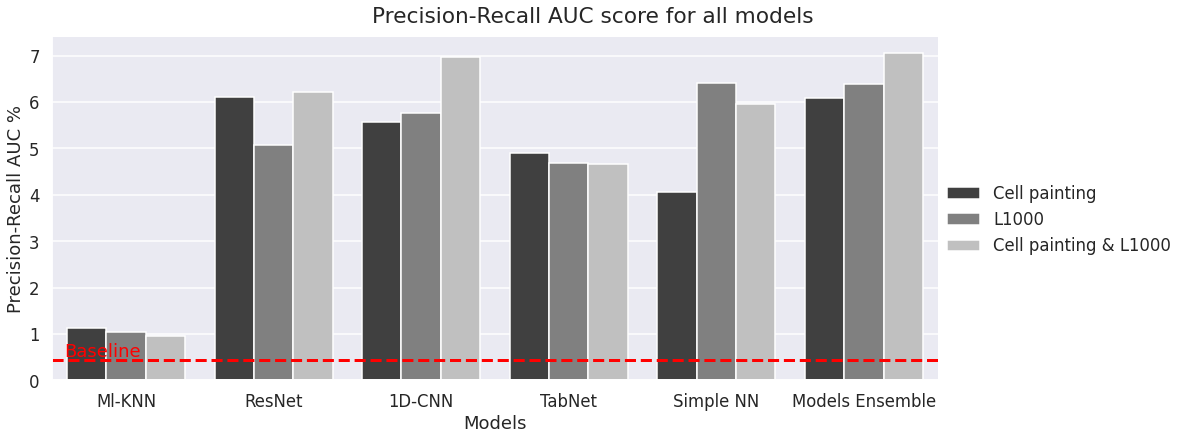

In [49]:
plot_model_predictions(df_pr_auc_normal, pr_baseline, "pr_auc_all_assays.png")

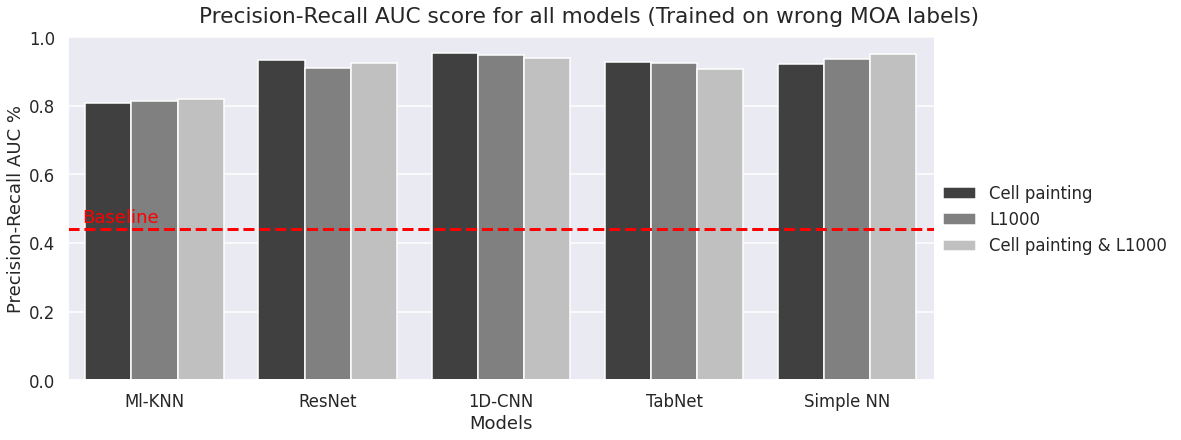

In [50]:
plot_model_predictions(df_pr_auc_shuffle, pr_baseline, "pr_auc_all_assays_wrong_labels.png", txt_cord_y = 0.46, 
                       title_label="Precision-Recall AUC score for all models (Trained on wrong MOA labels)")

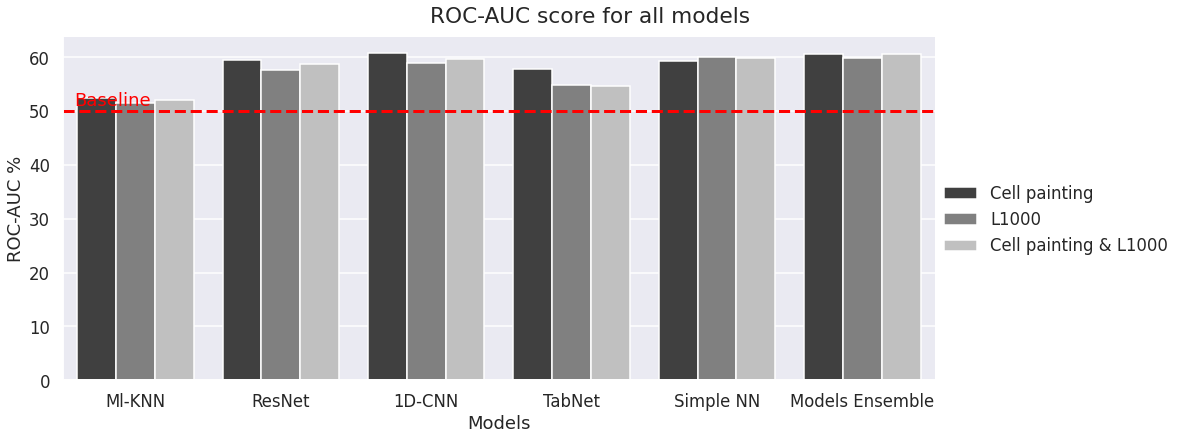

In [51]:
plot_model_predictions(df_roc_normal, 50, "roc_auc_all_assays.png", txt_cord_y = 51, y_label= "ROC-AUC %", title_label="ROC-AUC score for all models")

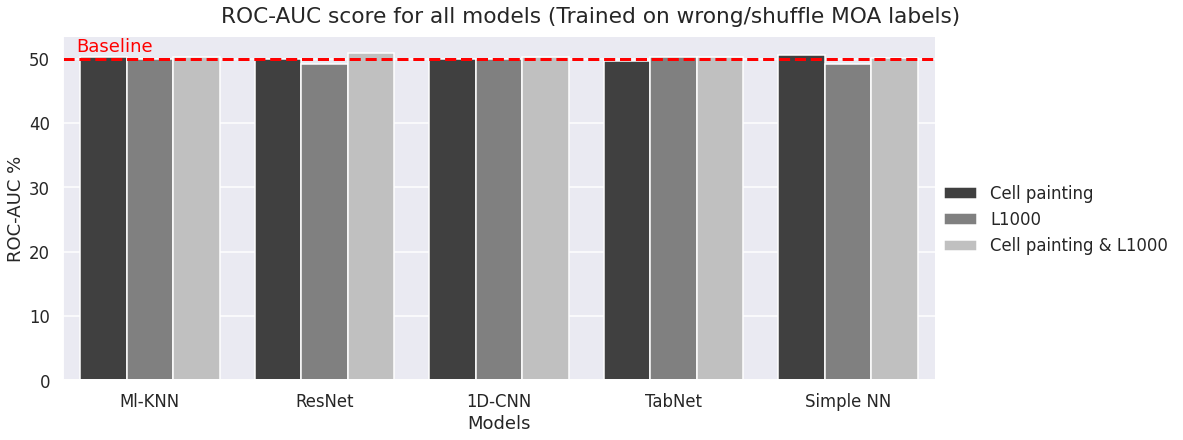

In [52]:
plot_model_predictions(df_roc_shuffle, 50, "roc_auc_all_assays_wrong_labels.png", txt_cord_y = 51, y_label= "ROC-AUC %", 
                       title_label="ROC-AUC score for all models (Trained on wrong/shuffle MOA labels)")

### - MOA predictions PER Dose treatment

In [53]:
df_cp_L1000_test['dose'].unique()

array([6, 5, 4, 3, 1, 2])

In [54]:
df_cp_test.rename(columns={'Metadata_dose_recode': "dose"}, inplace = True)

In [55]:
def get_actual_preds_dose(dose, df_test, df_model_preds, df_targets):
  """Get the actual MOA target labels and predictions for each Treatment dose"""
  dose_cpds_index = df_test[df_test['dose'] == dose].index
  df_dose_preds = df_model_preds.loc[dose_cpds_index].reset_index(drop = True)
  df_dose_targets = df_targets.loc[dose_cpds_index].reset_index(drop = True)
  return df_dose_targets, df_dose_preds

In [56]:
def dose_class_baseline(dose_num, df_test, df_targets):
  """Calculate the PR- baseline for each dose treatment"""
  dose_cpds_index = df_test[df_test['dose'] == dose_num].index
  df_class_targets = df_targets.loc[dose_cpds_index].reset_index(drop = True)
  class_baseline_score = calculate_baseline(df_class_targets)
  return class_baseline_score

In [57]:
dose_num = [1,2,3,4,5,6]

##### - The baseline pr-auc score for each dose is the same across all profiling assays i.e. the baseline score in CP == baseline score in L1000 or CP & L1000 combined

In [58]:
dose_no_skill_scrs = {}
for num in dose_num:
  class_name = 'dose_class_' + str(num)
  no_skill_score = dose_class_baseline(num, df_cp_test, df_cp_tst_targets)
  dose_no_skill_scrs[class_name] = no_skill_score

In [59]:
dose_no_skill_scrs

{'dose_class_1': 0.004408703446067207,
 'dose_class_2': 0.004402503684704171,
 'dose_class_3': 0.004393710595241142,
 'dose_class_4': 0.004384867288248342,
 'dose_class_5': 0.0043866987571377705,
 'dose_class_6': 0.0043851345028476174}

In [60]:
def evaluate(actual, pred, val_moas=val_moas):
  """Evaluate MOA predictions per dose using PR-AUC and ROC-AUC"""
  rocauc_score = roc_auc_score(np.ravel(actual[val_moas]), np.ravel(pred[val_moas]), average='macro')
  pr_auc_score = average_precision_score(np.ravel(actual[val_moas]), np.ravel(pred[val_moas]), average="micro")
  return [rocauc_score, pr_auc_score]

In [61]:
cp_preds_dose = [df_cp_mlknn_test, df_cp_resnet_test, df_cp_cnn_test, df_cp_tabnet_test, df_cp_simplenn_test, df_cp_blend_test]

L1_preds_dose = [df_L1000_mlknn_test, df_L1000_resnet_test, df_L1000_cnn_test, df_L1000_tabnet_test, df_L1000_simplenn_test, 
                 df_L1000_blend_test]

cp_L1_preds_dose = [df_cp_L1000_mlknn_test, df_cp_L1000_resnet_test, df_cp_L1000_cnn_test, df_cp_L1000_tabnet_test, 
                    df_cp_L1000_simplenn_test, df_cp_L1000_blend_test]

In [62]:
def dose_class_preds(assay_name, df_val, df_targets, model_preds, dose_num = dose_num):
  """Compute the evaluation scores for each dose treatment across all models for each profiling assay"""
  metrics = ['roc_auc_score', 'pr_auc_score',]
  model_name = ['mlknn_', 'resnet_', 'cnn_', 'tabnet_', 'simplenn_']
  class_results = {}
  for num in dose_num:
    for pred, mdl in zip(model_preds, model_name):
      metric_dict = {}
      class_name = 'moa_dose_' + assay_name + mdl + str(num)
      actual_, pred_ = get_actual_preds_dose(num, df_val, pred, df_targets)
      eval_list = evaluate(actual_, pred_)
      for idx, met in enumerate(metrics):
        class_results[class_name] = metric_dict
        class_results[class_name][met] = eval_list[idx]

  return class_results

In [63]:
cp_dose_preds = dose_class_preds('cp_', df_cp_test, df_cp_tst_targets, cp_preds_dose)
L1000_dose_preds = dose_class_preds('L1000_', df_L1000_test, df_L1000_tst_targets, L1_preds_dose)
cp_L1000_dose_preds = dose_class_preds('cp_L1000_', df_cp_L1000_test, df_cp_L1000_tst_targets, cp_L1_preds_dose)

In [64]:
def get_class_dfs(class_preds):
  """Create dataframes that includes the dose prediction scores, models, and treatment doses"""  
  df_results = pd.DataFrame([(k,k1,v1) for k,v in class_preds.items() for k1,v1 in v.items()], 
                            columns = ['id_name', 'metrics', 'values'])
  df_results['class'] = df_results['id_name'].apply(lambda x: x.split('_')[1] + '_' + x.split('_')[-1])
  df_results['model'] = df_results['id_name'].apply(lambda x: x.split('_')[-2])
  df_results['profile_tech'] = df_results['id_name'].apply(lambda x: 'CP_L1000' if len(x.split('_')) > 5 else x.split('_')[2])
  return df_results

In [65]:
df_dose_cp_L1_results = get_class_dfs(cp_L1000_dose_preds)
df_dose_cp_results = get_class_dfs(cp_dose_preds)
df_dose_L1_results = get_class_dfs(L1000_dose_preds)

In [66]:
df_dose_cp_L1_results.head()

,id_name,metrics,values,class,model,profile_tech
0,moa_dose_cp_L1000_mlknn_1,roc_auc_score,0.641742,dose_1,mlknn,CP_L1000
1,moa_dose_cp_L1000_mlknn_1,pr_auc_score,0.008565,dose_1,mlknn,CP_L1000
2,moa_dose_cp_L1000_resnet_1,roc_auc_score,0.657502,dose_1,resnet,CP_L1000
3,moa_dose_cp_L1000_resnet_1,pr_auc_score,0.040544,dose_1,resnet,CP_L1000
4,moa_dose_cp_L1000_cnn_1,roc_auc_score,0.661811,dose_1,cnn,CP_L1000


In [67]:
df_pr_cp_dose = df_dose_cp_results[df_dose_cp_results['metrics'] == 'pr_auc_score'].copy()
df_pr_L1_dose = df_dose_L1_results[df_dose_L1_results['metrics'] == 'pr_auc_score'].copy()
df_pr_cp_L1_dose = df_dose_cp_L1_results[df_dose_cp_L1_results['metrics'] == 'pr_auc_score'].copy()

In [68]:
def top_class_auc(df):
  """Out of all the predictive scores across all models, CHOOSE the best model prediction score for each treatment dose"""
  df_max_class = df.groupby(['class']).agg(['max'])
  df_max_class.columns = df_max_class.columns.droplevel(1)
  df_max_class.rename_axis(None, axis=0, inplace = True)
  df_max_class = df_max_class.reset_index().rename(columns={"index": "class"})
  df_cls_top_auc = df_max_class.sort_values(by='values', ascending = False)
  df_cls_top_auc.reset_index(drop=True, inplace = True)
  df_cls_top_auc.drop(['id_name', 'model'], axis = 1, inplace = True)
  return df_cls_top_auc

In [69]:
df_top_dose_pr_cp = top_class_auc(df_pr_cp_dose)
df_top_dose_pr_L1 = top_class_auc(df_pr_L1_dose)
df_top_dose_pr_cp_L1 = top_class_auc(df_pr_cp_L1_dose)

In [70]:
df_top_dose_pr_cp_L1

,class,metrics,values,profile_tech
0,dose_5,pr_auc_score,0.088424,CP_L1000
1,dose_6,pr_auc_score,0.080611,CP_L1000
2,dose_4,pr_auc_score,0.078108,CP_L1000
3,dose_3,pr_auc_score,0.072388,CP_L1000
4,dose_2,pr_auc_score,0.060751,CP_L1000
5,dose_1,pr_auc_score,0.041992,CP_L1000


In [71]:
df_best_doses = pd.concat([df_top_dose_pr_cp, df_top_dose_pr_L1, df_top_dose_pr_cp_L1], ignore_index = True)

In [72]:
df_dose_no_skill = pd.DataFrame(dose_no_skill_scrs.items(), columns = ['id_name', 'values'])

In [73]:
df_dose_no_skill['class'] = df_dose_no_skill['id_name'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[-1])
df_dose_no_skill['profile_tech'] = 'No_skill'
df_dose_no_skill['metrics'] = 'No_skill'

In [74]:
df_dose_no_skill.drop(['id_name'], axis = 1, inplace = True)

In [75]:
df_best_doses = pd.concat([df_best_doses, df_dose_no_skill], ignore_index = True)

In [76]:
df_best_doses['class'] = df_best_doses['class'].map({'dose_1': 0.04, 'dose_2': 0.12, 'dose_3':0.37, 'dose_4':1.11, 'dose_5':3.33, 'dose_6':10})
df_best_doses['profile_tech'] = df_best_doses['profile_tech'].map({'cp': 'Cell painting', 'L1000': 'L1000', 'CP_L1000':'Cell Painting and L1000', 'No_skill':'Baseline'})

In [77]:
df_best_doses['values'] = df_best_doses['values'].apply(lambda x:x*100)

In [78]:
dose_baseline = np.mean(list(dose_no_skill_scrs.values()))*100

Text(-0.42, 0.55, 'Baseline')

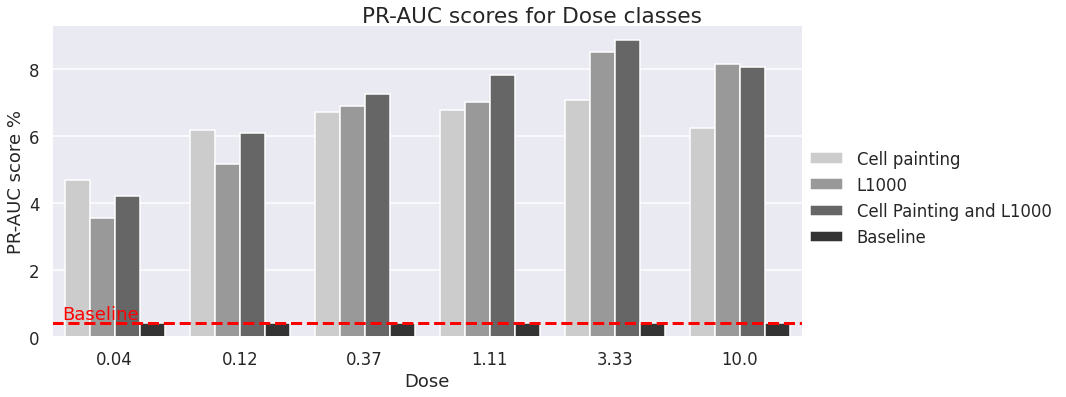

In [79]:
##plot moa predictions PER dose treatment
cat_plt = sns.catplot(x="class", y="values",
                hue="profile_tech", data=df_best_doses, kind="bar", palette="gray_r",
                height=5.4, aspect=2.1)
cat_plt._legend.set_title('')
cat_plt.set_axis_labels("Dose", "PR-AUC score %")
cat_plt.fig.suptitle("PR-AUC scores for Dose classes")
cat_plt.fig.subplots_adjust(top=.93)
plt.savefig(os.path.join(model_preds_figures, "pr_auc_all_dose.png"))
plt.axhline(dose_baseline, ls='--', linewidth=3, color='red')
plt.text(-0.42,0.55, "Baseline", color='red')

### - Test set MOA predictions

In [80]:
def evaluate_moa(actual, pred, moa):
  """Evaluate model predictions on an individual MOA basis using PR-AUC & ROC-AUC"""
  metrics_dict={}
  metrics_dict['roc_auc_score'] = roc_auc_score(actual.loc[:,moa], pred.loc[:,moa], average='macro')
  metrics_dict['pr_auc_score'] = average_precision_score(actual.loc[:,moa], pred.loc[:,moa], average="micro")
  return metrics_dict

In [81]:
moa_results = {}
for moa in val_moas:
  for idx, (assay_name, actual_df) in enumerate(zip(assays, targets_dfs)):
    for mdl, pred_df in zip(model_name, preds_all[idx]):
      model_score = {}
      score_name = moa + '_' +assay_name + mdl
      moa_eval_dict = evaluate_moa(actual_df, pred_df, moa)
      moa_results[score_name] = moa_eval_dict

In [82]:
df_moa_preds = pd.DataFrame([(k,k1,v1) for k,v in moa_results.items() for k1,v1 in v.items()], 
                              columns = ['id_name', 'metrics', 'values'])

In [83]:
df_moa_preds['moa'] = df_moa_preds['id_name'].apply(lambda x: x.split('_')[0])
df_moa_preds['model'] = df_moa_preds['id_name'].apply(lambda x: x.split('_')[-1])
df_moa_preds['profile_tech'] = df_moa_preds['id_name'].apply(lambda x: 'CP_L1000' if len(x.split('_')) == 4 else x.split('_')[1])

In [84]:
df_moa_preds['model'].unique()

array(['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'mlknnshuf',
       'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf', 'blend'],
      dtype=object)

In [85]:
normal_models

['mlknn', 'resnet', 'cnn', 'tabnet', 'simplenn', 'blend']

In [86]:
shuffle_models

['mlknnshuf', 'resnetshuf', 'cnnshuf', 'tabnetshuf', 'simplennshuf']

In [87]:
df_moa_preds_normal = df_moa_preds[df_moa_preds['model'].isin(normal_models)].reset_index(drop=True)
df_moa_preds_shuffle = df_moa_preds[df_moa_preds['model'].isin(shuffle_models)].reset_index(drop=True)

In [88]:
def get_profile_tech_preds(df):
  """Get dataframes for each profiling assays"""
  df_cp = df[df['profile_tech'] == 'CP'].reset_index(drop=True)
  df_L1 = df[df['profile_tech'] == 'L1000'].reset_index(drop=True)
  df_cp_L1 = df[df['profile_tech'] == 'CP_L1000'].reset_index(drop=True)
  return df_cp,df_L1,df_cp_L1

In [89]:
df_moa_cp_preds, df_moa_L1_preds, df_moa_cp_L1_preds = get_profile_tech_preds(df_moa_preds_normal)
df_moa_cp_shuf, df_moa_L1_shuf, df_moa_cp_L1_shuf = get_profile_tech_preds(df_moa_preds_shuffle)

In [90]:
def get_metric_preds(df_cp,df_L1,df_cp_L1):
  """Get PR-AUC scores for each profiling assays"""
  df_pr_cp = df_cp[df_cp['metrics'] == 'pr_auc_score'].copy()
  df_pr_L1 = df_L1[df_L1['metrics'] == 'pr_auc_score'].copy()
  df_pr_cp_L1 = df_cp_L1[df_cp_L1['metrics'] == 'pr_auc_score'].copy()
  return df_pr_cp,df_pr_L1,df_pr_cp_L1

In [91]:
df_pr_cp_preds, df_pr_L1_preds, df_pr_cp_L1_preds = get_metric_preds(df_moa_cp_preds, df_moa_L1_preds, df_moa_cp_L1_preds)
df_pr_cp_shuf, df_pr_L1_shuf, df_pr_cp_L1_shuf = get_metric_preds(df_moa_cp_shuf, df_moa_L1_shuf, df_moa_cp_L1_shuf)

In [92]:
def top_moa_auc(df):
  """Choose the best model predictive scores among all model predictions for each MOA"""
  df_max_moa = df.groupby(['moa']).agg(['max'])
  df_max_moa.columns = df_max_moa.columns.droplevel(1)
  df_max_moa.rename_axis(None, axis=0, inplace = True)
  df_max_moa = df_max_moa.reset_index().rename(columns={"index": "moa"})
  df_moa_top_auc = df_max_moa.sort_values(by='values', ascending = False)
  df_moa_top_auc.reset_index(drop=True, inplace = True)
  df_moa_top_auc.drop(['id_name', 'model'], axis = 1, inplace = True)
  return df_moa_top_auc

In [93]:
df_top_moa_pr_cp = top_moa_auc(df_pr_cp_preds)
df_top_moa_pr_L1 = top_moa_auc(df_pr_L1_preds)
df_top_moa_pr_cp_L1 = top_moa_auc(df_pr_cp_L1_preds)

In [94]:
df_shuf_moa_pr_cp = top_moa_auc(df_pr_cp_shuf)
df_shuf_moa_pr_L1 = top_moa_auc(df_pr_L1_shuf)
df_shuf_moa_pr_cp_L1 = top_moa_auc(df_pr_cp_L1_shuf)

In [95]:
moa_cp_baseline = np.mean(df_shuf_moa_pr_cp['values'])
moa_L1_baseline = np.mean(df_shuf_moa_pr_L1['values'])
moa_cp_L1_baseline = np.mean(df_shuf_moa_pr_cp_L1['values'])

In [96]:
df_moa_pr_cp = df_top_moa_pr_cp[['moa', 'values']].copy()
df_moa_pr_L1 = df_top_moa_pr_L1[['moa', 'values']].copy()
df_moa_pr_cp_L1 = df_top_moa_pr_cp_L1[['moa', 'values']].copy()

In [97]:
df_moa_pr_cp.rename(columns={"values": "cp_values"}, inplace = True)
df_moa_pr_L1.rename(columns={"values": "L1_values"}, inplace = True)
df_moa_pr_cp_L1.rename(columns={"values": "cp_L1_values"}, inplace = True)

In [98]:
df_moa_prs = pd.merge(df_moa_pr_cp, df_moa_pr_L1, on='moa')
df_moa_prs = pd.merge(df_moa_prs, df_moa_pr_cp_L1, on = 'moa')

In [99]:
df_moa_prs.head(10)

,moa,cp_values,L1_values,cp_L1_values
0,pkc activator,1.000000,1.000000,1.000000
1,plk inhibitor,0.998925,0.228430,0.997076
2,mek inhibitor,0.972066,0.915357,0.947166
3,mtor inhibitor,0.787137,0.926403,0.809700
4,xiap inhibitor,0.779495,0.899641,0.840504
5,glucocorticoid receptor agonist,0.761821,0.767752,0.792071
6,proteasome inhibitor,0.680891,0.621404,0.779126
7,topoisomerase inhibitor,0.604401,0.755171,0.721605
8,hsp inhibitor,0.573869,0.515091,0.535699
9,tubulin polymerization inhibitor,0.547907,0.256841,0.457335


### - Plot Individual MOA predictions

##### - Note: The red horizontal and vertical lines are PR-AUC baseline score based on getting the average shuffle moa predictions across all MOAs for each profiling assays i.e. Cell Painting (CP), L1000, & Integrated CP & L1000

In [100]:
def plot_moa_predictions(df, file_name, col_x, col_y, x_label, y_label, title_label, baseline_x, baseline_y, path=model_preds_figures):
  """Plot MOA PR-AUC scores for profiling assays"""
  if not os.path.exists(path):
    os.mkdir(path)
  value=((df[col_y] > 0.2) | (df[col_x] > 0.2))
  df['color']= np.where(value==True, "purple", "skyblue")
  plt.figure(figsize=(18,10))
  reg_plt=sns.regplot(data=df, x=col_x, y=col_y, fit_reg=False, marker="o", color="skyblue", scatter_kws={'facecolors':df['color'], 's':100})
  reg_plt.set_title(f"{title_label}, annotating MOAs above 0.2 PR-AUC scores")
  reg_plt.set(xlabel=x_label, ylabel=y_label)
  plt.axhline(baseline_y, ls='--', linewidth=3, color='red', alpha=0.5)
  plt.axvline(baseline_x, ls='--', linewidth=3, color='red', alpha=0.5)
  ##add annotations one by one with a loop
  text = [reg_plt.text(df[col_x][line], df[col_y][line], df.moa[line],
                       fontdict=dict(color= 'black',size=11.5),) for line in range(df.shape[0]) 
                       if (((df[col_x][line] > 0.2) | (df[col_y][line] > 0.2)))]
  adjust_text(text, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
  plt.savefig(os.path.join(path, file_name))
  plt.show()

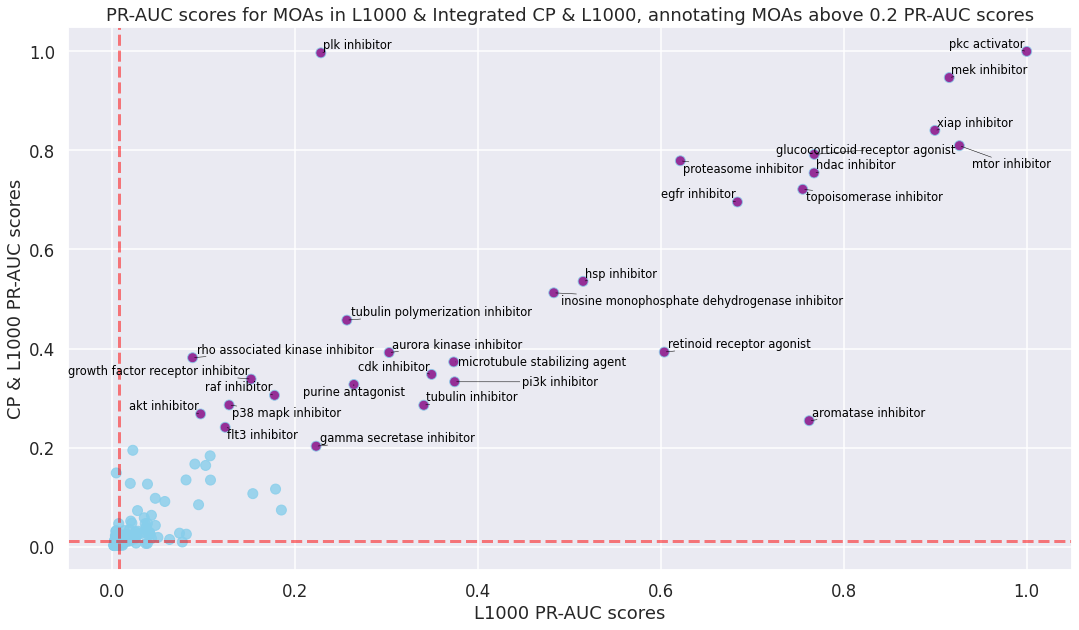

In [101]:
plot_moa_predictions(df_moa_prs, 'pr_auc_moas_cp_and_L1000_vs_L1000.png', 'L1_values', 'cp_L1_values', "L1000 PR-AUC scores", "CP & L1000 PR-AUC scores", 
                     "PR-AUC scores for MOAs in L1000 & Integrated CP & L1000", moa_L1_baseline, moa_cp_L1_baseline)

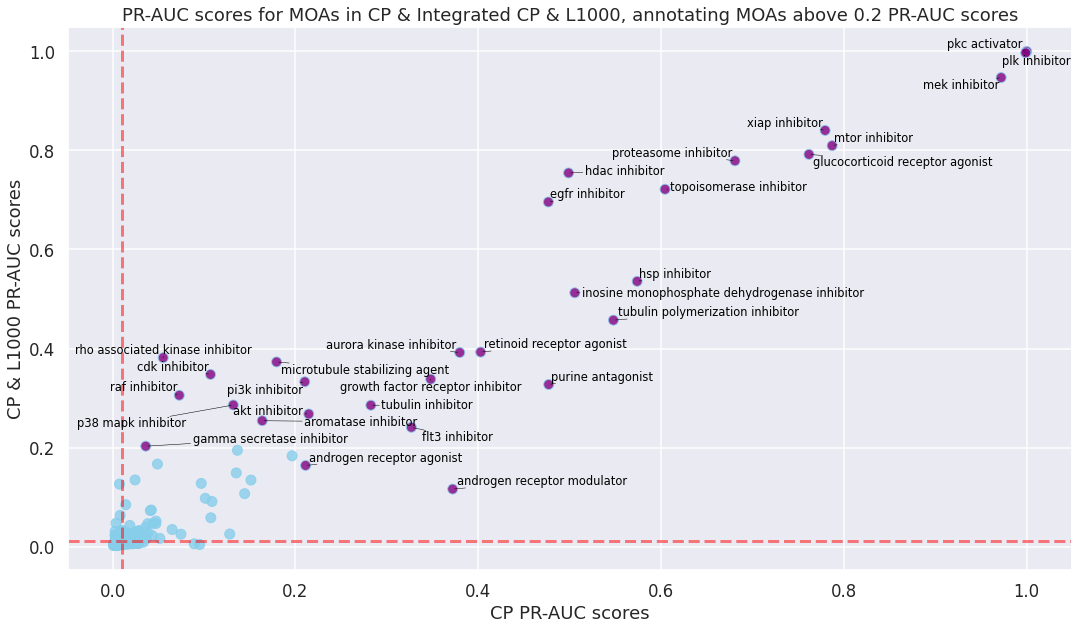

In [102]:
plot_moa_predictions(df_moa_prs, 'pr_auc_moas_cp_and_L1000_vs_cp.png', 'cp_values', 'cp_L1_values', "CP PR-AUC scores", "CP & L1000 PR-AUC scores", 
                     "PR-AUC scores for MOAs in CP & Integrated CP & L1000", moa_cp_baseline, moa_cp_L1_baseline)

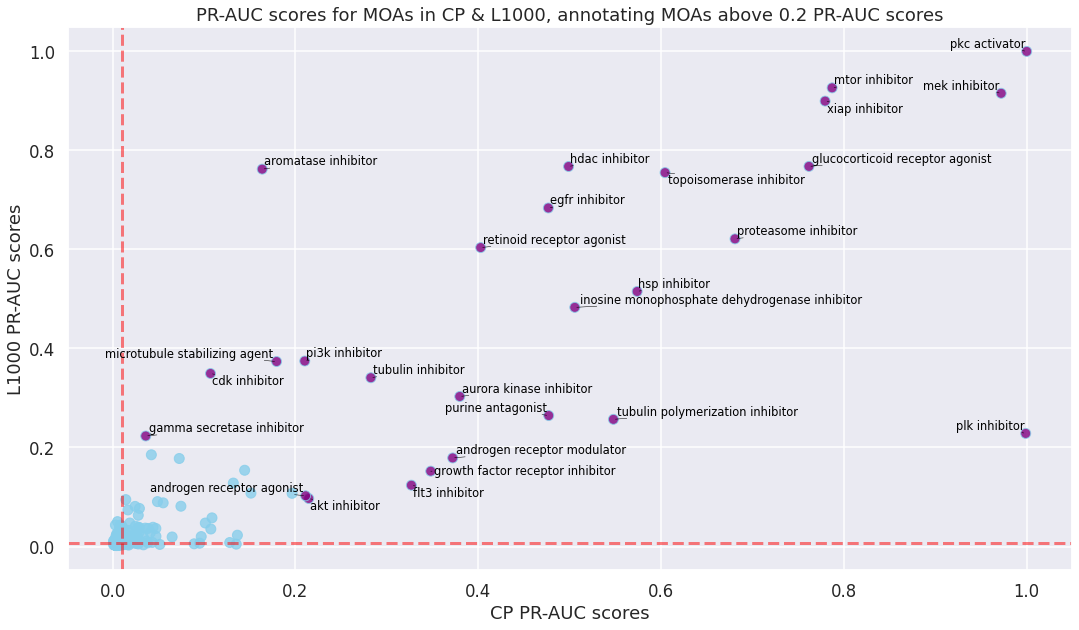

In [103]:
plot_moa_predictions(df_moa_prs, 'pr_auc_moas_cp_vs_L1000.png', 'cp_values', 'L1_values', "CP PR-AUC scores", "L1000 PR-AUC scores", 
                     "PR-AUC scores for MOAs in CP & L1000", moa_cp_baseline, moa_L1_baseline)